In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

In [8]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+",
           skiprows=22, header=None)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mahes\AppData\Local\Temp\ipykernel_29584\3211529144.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+",


In [9]:
X = np.hstack([raw_df.values[::2, :],
        raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [16]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [17]:
X_train, X_test,\
  y_train, y_test = train_test_split(X, y,
                    test_size=0.2,
                    random_state=1)

In [18]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [19]:
# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [-1.12386867e-01  5.80587074e-02  1.83593559e-02  2.12997760e+00
 -1.95811012e+01  3.09546166e+00  4.45265228e-03 -1.50047624e+00
  3.05358969e-01 -1.11230879e-02 -9.89007562e-01  7.32130017e-03
 -5.44644997e-01]
Variance score: 0.7634174432138459


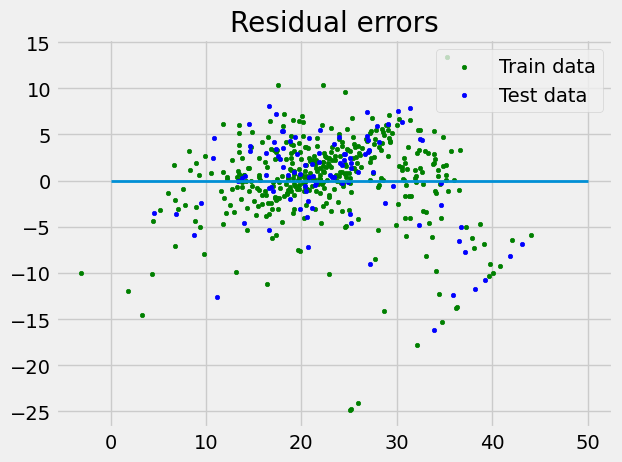

In [20]:
plt.style.use('fivethirtyeight')
# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')
# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
# plotting legend
plt.legend(loc='upper right')
# plot title
plt.title("Residual errors")
# method call for showing the plot
plt.show()